NOv 17-23

- find central gal that under the condition z<0.1, 0.4:

   + find the galaxies that have z<0.1;
   
   + pick the central galaxies in that;
   
   + take the correspond N_GC and M_h of the central;
   
   + plot Mh vs N_GC;

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.table import Table

In [3]:
import astropy.io.fits as fits

In [4]:
path='/data/lemn/DESIdata/'

In [6]:
#load data 
data = fits.getdata(path+'galaxies/DESIDR9_NGC_galaxy.fits')

In [7]:
#load infor of members in group
mem = fits.getdata(path+'members/iDESIDR9_NGC_1.fits')

In [49]:
cen_check = np.loadtxt(path+'members/iDESIDR9_NGC_1', usecols =(2))

In [31]:
mem_to_group = mem['groupID']

In [8]:
#load infor of members in group
group = fits.getdata(path+'groups/DESIDR9_NGC_group.fits')

In [95]:
group_ID = group['groupID']

In [79]:
#load theory results
M_halo_theo                 = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(0))
#N_GC_Mill_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(1))
#err_N_GC_Mill_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(4))
#N_GC_COCO_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(5))
#err_N_GC_COCO_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(0))
#N_GC_Mill_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(1))
#err_N_GC_Mill_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(4))
#N_GC_COCO_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(5))
#err_N_GC_COCO_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(6))

In [80]:
# load EMOSAICS Fig.1 data
mass_E   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(1))
#square   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(2))
#star     = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(3))

In [81]:
#load Forbes 18 data
M_halo_F = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(2))
N_GC_F   = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(3))
M_halo_F = 10**M_halo_F

In [82]:
#load blue GCs from Creasey data
M_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(0))
N_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(1))

In [9]:
z = data['z']

In [97]:
z_pick = 0.1

In [98]:
arg_pick = np.argwhere(z <= z_pick)

In [99]:
arg_pick = arg_pick.reshape(len(arg_pick))

In [100]:
cen_pick = np.argwhere(cen_check[arg_pick] == 1)

In [101]:
print(max(mem_to_group), min(mem_to_group), group_ID) 
#because group_ID starts from 1, while Python index starts from 0, so we need to subtract 1 to get the right index in group_ID array

51440885.0 1.0 [1.0000000e+00 2.0000000e+00 3.0000000e+00 ... 5.1440883e+07 5.1440884e+07
 5.1440885e+07]


In [102]:
group_pick = mem_to_group[arg_pick][cen_pick] #id of groups that (contains the central gal) sastified z<0.1

In [103]:
group_pick = group_pick.reshape(len(group_pick)).astype(int)

In [104]:
print(group_pick)

[19900971  1319525 19900961 ... 35648500 35648582 35648553]


In [105]:
z_04   = 0.4
arg_04 = np.argwhere(z <= z_04)
arg_04 = arg_04.reshape(len(arg_04))
cen_04 = np.argwhere(cen_check[arg_04] == 1)
group_04 = mem_to_group[arg_04][cen_04] 
group_04 = group_04.reshape(len(group_04)).astype(int)

In [90]:
#load the summation GCs and M_h
tot = fits.getdata('/data/lemn/results/M_h_NGCs_plus_minus.fits')

In [91]:
N_GC = tot['NGCs']
M_h  = tot['M_h M_sun']

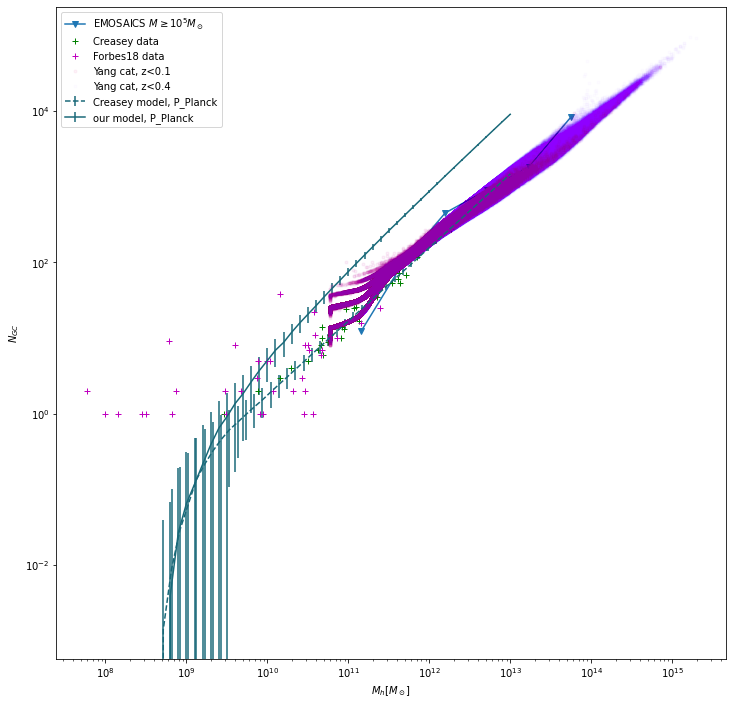

In [107]:

plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale('log')
#plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
#plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO')
#plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
#plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO')

plt.plot(mass_E, triangle, 'v-', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
#plt.plot(mass_E, square,   's-', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
#plt.plot(mass_E, star, '*-',     label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

plt.plot(M_Creasey, N_Creasey, 'g+', label ='Creasey data')
plt.plot(M_halo_F, N_GC_F, 'm+',     label ='Forbes18 data')

plt.plot(M_h[group_pick-1],N_GC[group_pick-1],'.',color='#e11584', alpha =0.05, label = 'Yang cat, z<0.1' )
plt.plot(M_h[group_04-1],N_GC[group_04-1],'.',color='#8F00FF', alpha =0.01, label = 'Yang cat, z<0.4' )

plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()
#plt.savefig('tot_GC_z01_04.pdf')
#plt.show()